In [32]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [33]:
# Temperature data
temperature_data = [24.982851239669422, 25.005619834710743, 25.211735537190087, 24.42123966942149, 25.097479338842973,
                    24.49202479338843, 25.3498347107438, 25.05004132231405, 24.63012396694215, 25.29876033057851,
                    25.61177685950413, 24.936983471074385, 24.649173553719006, 24.79801652892562, 24.629173553719006,
                    24.62157024793389]

In [34]:
# Yield data
yield_data = [37927.229999999996, 37843.04, 37883.9, 39470.14, 42106.15, 41190.67, 41183.520000000004, 42991.4,
              43144.880000000005, 43190.92, 41829.31, 41196.979999999996, 43074.21, 42166.969999999994, 41140.299999999996,
              43410.14]

In [35]:
# Normalize temperature data
temperature_scaler = MinMaxScaler()
temperature_scaled = temperature_scaler.fit_transform(np.array(temperature_data).reshape(-1, 1))

In [36]:
# Normalize yield data
yield_scaler = MinMaxScaler()
yield_scaled = yield_scaler.fit_transform(np.array(yield_data).reshape(-1, 1))

In [37]:
# Define the equation
def yield_model(temperature, Ymax, Topt, sigma):
    return Ymax * np.exp(-((temperature - Topt) / sigma) ** 2)

In [38]:

# Provide initial parameter values closer to the expected optimal values
initial_params = [1.0, 25.0, 1.0]

In [39]:
# Fit the model to the data
popt, pcov = curve_fit(yield_model, temperature_scaled.flatten(), yield_scaled.flatten(), p0=initial_params)

c:\Users\User\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [40]:

# Extract the optimized parameters
Ymax_opt, Topt_opt, sigma_opt = popt

In [41]:
# Generate temperature values for the curve
temperature_curve = np.linspace(min(temperature_scaled), max(temperature_scaled), len(temperature_scaled))

In [42]:
# Predict yield using the optimized parameters
yield_curve = yield_model(temperature_curve, Ymax_opt, Topt_opt, sigma_opt)

In [43]:
# Normalize the yield curve
yield_curve_scaled = yield_scaler.transform(yield_curve.reshape(-1, 1))

In [44]:
# Inverse scale the data to obtain original values
temperature_scaled = temperature_scaler.inverse_transform(temperature_scaled)
yield_scaled = yield_scaler.inverse_transform(yield_scaled)
yield_curve = yield_scaler.inverse_transform(yield_curve_scaled)

In [45]:
# Calculate R-squared value
r2 = r2_score(yield_data, yield_curve.flatten())

In [46]:
# Calculate root mean square error (RMSE)
rmse = np.sqrt(mean_squared_error(yield_data, yield_curve.flatten()))

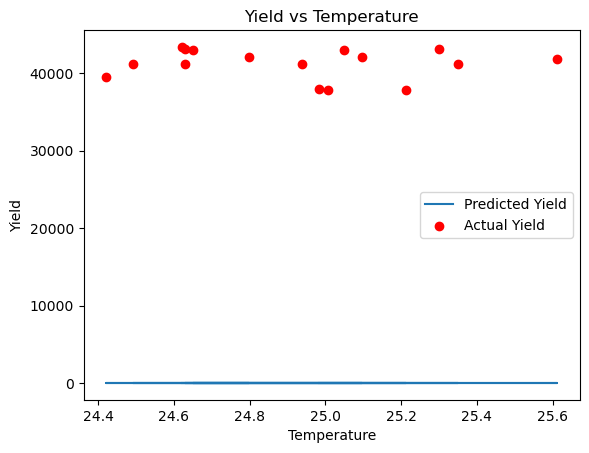

In [47]:
# Plot the predicted curve and actual data
plt.plot(temperature_scaled, yield_curve, label='Predicted Yield')
plt.scatter(temperature_scaled, yield_data, color='red', label='Actual Yield')
plt.xlabel('Temperature')
plt.ylabel('Yield')
plt.title('Yield vs Temperature')
plt.legend()
plt.show()

In [48]:
print("R-squared value:", r2)
print("Root Mean Square Error (RMSE):", rmse)

R-squared value: -473.4555058759821
Root Mean Square Error (RMSE): 41277.883213227666
